In [1]:
from google.protobuf import text_format
from ffn.inference import inference
from ffn.inference import inference_pb2

In [4]:
config = '''image {
  hdf5: "../ffn/third_party/neuroproof_examples/training_sample2/grayscale_maps.h5:raw"
}
image_mean: 128
image_stddev: 33
checkpoint_interval: 1800
seed_policy: "PolicyPeaks"
model_checkpoint_path: "../ffn/models/fib25/model.ckpt-27465036"
model_name: "convstack_3d.ConvStack3DFFNModel"
model_args: "{\\"depth\\": 12, \\"fov_size\\": [33, 33, 33], \\"deltas\\": [8, 8, 8]}"
segmentation_output_dir: "results/fib25/training2"
inference_options {
  init_activation: 0.95
  pad_value: 0.05
  move_threshold: 0.9
  min_boundary_dist { x: 1 y: 1 z: 1}
  segment_threshold: 0.6
  min_segment_size: 1000
}'''
req = inference_pb2.InferenceRequest()
_ = text_format.Parse(config, req)

In [5]:
runner = inference.Runner()
runner.start(req)
canvas, alignment = runner.make_canvas((0, 0, 0), (250, 250, 250))

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



Instructions for updating:
Please use `layer.__call__` method instead.


Instructions for updating:
Please use `layer.__call__` method instead.


INFO:tensorflow:Restoring parameters from ../ffn/models/fib25/model.ckpt-27465036


INFO:tensorflow:Restoring parameters from ../ffn/models/fib25/model.ckpt-27465036


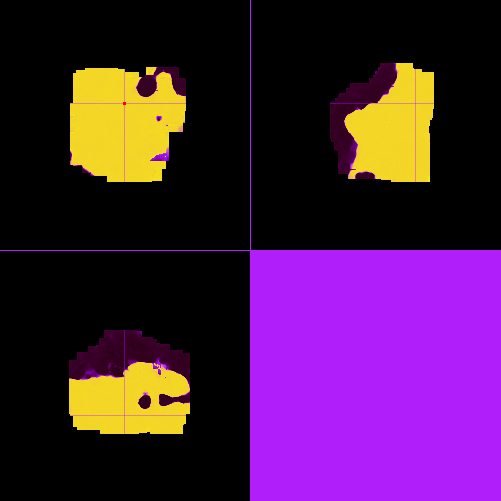

In [ ]:
# Create a single segment, starting from the specified origin point.
canvas.segment_at((125, 125, 125),  # zyx
                  dynamic_image=inference.DynamicImage(),
                  vis_update_every=1)